# <font style="color:blue">RetinaNet pomocí Detectron2</font>

V tomto notebooku doladíme model RetinaNet pomocí Detectron2.

**V notebooku projdeme následující:**

- Úvod do Detectron2,


- Instalace Detectron2,


- Jemné doladění RetinaNet pomocí Detectron2, a


- Úvod do hodnocení detekce COCO a hodnocení modelu: Metrika hodnocení COCO je standardní metrikou pro hodnocení detekce objektů. 

# <font style="color:blue">1. Úvod do Detectron2</font>

Detectron je open-source platforma pro detekci objektů, kterou poskytuje Facebook AI Research. Cílem Detectronu je poskytnout vysoce kvalitní a výkonný kódový základ pro výzkum detekce objektů. Je navržen tak, aby byl flexibilní a podporoval rychlou implementaci a vyhodnocení nových výzkumných poznatků. Detectron2, který zahrnuje pokroky projektu, je úplným přepisem Detectronu a je napsán v PyTorch. 

Obsahuje vysoce kvalitní implementace nejmodernějších algoritmů pro detekci objektů, včetně DensePose, panoptických pyramidálních sítí a mnoha variant Mask RCNN. DensePose (hustá odhad lidské pózy) má za cíl mapovat všechny pixely lidského těla na RGB obrázku na 3D povrch lidského těla. Panoptická segmentace kombinuje segmentaci instancí, která se používá k rozpoznávání samostatných objektů v popředí, jako jsou zvířata nebo lidé, se sémantickou segmentací, která označuje pixely na pozadí obrazu třídami, jako jsou silnice, obloha nebo tráva.

Má modulární design, který uživatelům umožňuje zapojit vlastní implementace modulů téměř do jakékoli části systému detekce objektů. To znamená, že mnoho nových výzkumných projektů lze napsat ve stovkách řádků kódu s čistým oddělením mezi jádrem knihovny Detectron2 a novou výzkumnou implementací. Facebook AI Research využívá Detectron2 k návrhu a trénování modelů detekce pózy nové generace, které pohánějí Smart Camera, systém AI kamer ve videokonferenčních zařízeních Facebook Portal.
   
Nyní pojďme začít s Detectron2.

# <font style="color:blue">2. Instalace</font>

Nainstalujte Detectron2 z předzpracovaného Detectron2. Předpřipravený Detectron lze použít pouze s nejnovější verzí PyTorch.

Předpokládáme, že máme nainstalovanou nejnovější verzi `PyTorch` a `OpenCV`. Nainstalujme `pycocotools` a předpřipravený `detectron2`. 

##  <font style="color:green">2.1. Nainstaluj pycocotools</font> 
   - COCO je velká sada obrazových dat navržená pro detekci objektů, segmentaci, detekci klíčových bodů osob, segmentaci věcí a generování titulků. Toto Python API pomáhá načítat, analyzovat a vizualizovat anotace v sadě dat COCO.


In [1]:
!python --version

Python 3.10.14


In [2]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-trsmie2p
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-trsmie2p
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=101098 sha256=6deb07e368a648282809db461ac8ac0e32eca5d7944e5d6d1f895d4597cc19f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-26b4pjvc/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools


##  <font style="color:green">2.2. Nainstalujte Předzpracovaný Detectron2</font> 

In [3]:
!python -m pip install pyyaml
import sys, os, distutils.core

!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Cloning into 'detectron2'...
remote: Enumerating objects: 15792, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 15792 (delta 15), reused 27 (delta 8), pack-reused 15743 (from 1)
Receiving objects: 100% (15792/15792), 6.36 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (11509/11509), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.0 MB/s eta 0:

In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
torch:  2.4 ; cuda:  2.4.0
detectron2: 0.6


You can replace `cu101` with `cu{100,92}` or `cpu`.

**V případě jakýchkoliv chyb během instalace se podívejte na tento <a href="https://detectron2.readthedocs.io/tutorials/install.html#common-installation-issues">odkaz</a> z oficiální instalační příručky .**

# <font style="color:blue">3. RetinaNet Fine-tuning</font>

Koncept RetinaNet již známe. Detectron2 má předtrénovaný model RetinaNet. Zde načteme předem trénovaný model RetinaNet a doladíme ho pro vytvoření detektoru dopravních značek.

## <font style="color:green">3.1. Stáhněte si Dataset</font>

**[Stáhněte si datovou sadu dopravních značek](https://www.dropbox.com/s/d8y6uc06027fpqo/traffic_sign_data.zip?dl=1)**

Stáhněte si datovou sadu dopravních značek z [zde](https://www.dropbox.com/s/d8y6uc06027fpqo/traffic_sign_data.zip?dl=1) a rozbalte ji. Umístěte rozbalený adresář do adresáře notebooku.

Budeme mít následující adresářovou strukturu:

```
traffic_sign_data/
├── JPEGImages
├── labels
├── traffic_sign_test.txt
└── traffic_sign_train.txt
```

- **`JPEGImages`:** Adresář, který má všechny obrázky ve formátu `.jpg`.


- **`labels`:** Adresář, který má soubory `.txt` s ohraničujícími rámečky odpovídajícími každému obrázku `.jpg`.


- **`traffic_sign_train.txt`:** Snímky jsou rozděleny na `trénovací` a `testovací` data. Tento soubor obsahuje cesty všech tréninkových obrázků.


- **`traffic_sign_test.txt`:** Tento soubor obsahuje cesty všech ověřovacích obrázků.

**Má tréninkový datový soubor o velikosti `1211` a ověřovací soubor o velikosti `305`.**

In [5]:
%matplotlib inline

In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt

# model_zoo has lots of pre-trained models
from detectron2 import model_zoo

# DefaultTrainer is a class for training object detector
from detectron2.engine import DefaultTrainer
# DefaultPredictor is class for inference
from detectron2.engine import DefaultPredictor

# detectron2 has its configuration format
from detectron2.config import get_cfg
# detectron2 has implemented Visualizer of object detection
from detectron2.utils.visualizer import Visualizer

# from DatasetCatalog, detectron2 gets dataset and from MetadatCatalog it gets metadata of the dataset
from detectron2.data import DatasetCatalog, MetadataCatalog

# BoxMode supports bounding boxes in different format
from detectron2.structures import BoxMode

# COCOEvaluator based on COCO evaluation metric, inference_on_dataset is used for evaluation for a given metric
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# build_detection_test_loader, used to create test loader for evaluation
from detectron2.data import build_detection_test_loader

##  <font style="color:green">3.2. Datová sada ve formátu Detectron2</font> 

Detectron2 potřebuje data ve formátu seznamu slovníků (`list[dict]`).

Slovník (`dict`) by měl mít následující formát:
```json
{
    'file_name': str,              # path of the image
    'image_id': int or str,        # a unique id that identifies the image.
    'height': int,                 # height of the image,
    'width': int,                  # width of the image
    'annotations': [
            {
                'bbox': [xmin, ymin, xmax, ymax],   # bounding box in XYXY_ABS format
                'bbox_mode': BoxMode.XYXY_ABS,      # it supports bounding box in different format
                'category_id': int,                 # class id 
                'iscrowd': 0 or 1                   # if it is a crowd of the objects. 
                                                    # In our case it will be 0
            }
        ]
}
```

Získejte další podrobnosti o formátu [zde](https://detectron2.readthedocs.io/tutorials/datasets.html)

Podrobnosti o `BoxMode` [zde](https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode)

In [7]:
# write a function that loads the dataset into detectron2's standard format
def get_traffic_sign_dicts(data_root, txt_file):
    dataset_dicts = []
    filenames = []
    csv_path = os.path.join(data_root, txt_file)
    with open(csv_path, "r") as f:
        for line in f:
            filenames.append(line.rstrip())

    for idx, filename in enumerate(filenames):
        record = {}
        
        image_path = os.path.join(data_root, filename)
        
        height, width = cv2.imread(image_path).shape[:2]
        
        record['file_name'] = image_path
        record['image_id'] = idx
        record['height'] = height
        record['width'] = width
        
        image_filename = os.path.basename(filename)
        image_name = os.path.splitext(image_filename)[0]
        annotation_path = os.path.join(data_root, 'labels', '{}.txt'.format(image_name))
        annotation_rows = []

        with open(annotation_path, "r") as f:
            for line in f:
                temp = line.rstrip().split(" ")
                annotation_rows.append(temp)

        objs = []
        for row in annotation_rows:
            xcentre = int(float(row[1])*width)
            ycentre = int(float(row[2])*height)
            bwidth = int(float(row[3])*width)
            bheight = int(float(row[4])*height)
            
            xmin = int(xcentre - bwidth/2)
            ymin = int(ycentre - bheight/2)
            xmax = xmin  + bwidth
            ymax = ymin + bheight
    
            obj= {
                'bbox': [xmin, ymin, xmax, ymax],
                'bbox_mode': BoxMode.XYXY_ABS,
                # alternatively, we can use bbox_mode = BoxMode.XYWH_ABS
                # 'bbox': [xmin, ymin, bwidth, bheight],
                # 'bbox_mode': BoxMode.XYWH_ABS,
                'category_id': int(row[0]),
                'iscrowd': 0
            }
        
            objs.append(obj)
        record['annotations'] = objs
        dataset_dicts.append(record)
    return dataset_dicts

##  <font style="color:green">3.3. Registrujeme Datovou sadu</font> 

V detectron 2 musíme registrovat data a jejich metadata (např. třídy), která budou použita pro trénování a ověřování.

Začněme s naší konfigurací

In [8]:
# configurations

data_root = '/kaggle/input/opencv-traffic-sign-data/traffic_sign_data'
train_txt = 'traffic_sign_train.txt'
test_txt = 'traffic_sign_test.txt'

train_data_name = 'traffic_sign_train'
test_data_name = 'traffic_sign_test'

thing_classes = ['traffic-sign']

output_dir = 'outputs'

def count_lines(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

train_img_count = count_lines(os.path.join(data_root, train_txt))

#### `detectron2.data.DatasetCatalog.register`:
Používá se k registraci dat pomocí detectron 2.

**Parametry:**

- `name` (`str`): název, který identifikuje datovou sadu, např. "coco_2014_train"


- `func` (`callable`): callable, která nebere žádné argumenty a vrací seznam slovníků (`list[dict]`).

Získejte podrobnosti o `DatasetCatalog` [zde](https://detectron2.readthedocs.io/modules/data.html#detectron2.data.DatasetCatalog).

Naše datová funkce (`get_traffic_sign_dicts`) vrací seznam slovníků (`list[dict]`), ale vyžaduje argumenty. Pomocí lambda funkce můžeme vytvořit funkci, která nebude vyžadovat žádné argumenty, následovně:

```
callable_fun = lambda: get_traffic_sign_dicts(data_root, train_txt)
```

#### `detectron2.data.MetadataCatalog`:

MetadataCatalog poskytuje přístup k `Metadata` dané datové sady.

Metadata spojená s určitým názvem je singleton: jednou vytvořená, metadata zůstanou aktivní a budou vrácena budoucími voláními funkce `get(name)`.

#### `detectron2.data.MetadataCatalog.get`:

**Parametry:**	

- `name` (`str`): název datové sady (např. traffic_sign_train).

**`Returns`:** `Metadata` Instance metadat přidružená k tomuto názvu, nebo vytvořte prázdnou, pokud žádná není k dispozici.

**Naše třídy můžeme aktualizovat pomocí vráceného `metadata.set(thing_classes=thing_classes)`**

Získejte podrobnosti o `MetadataCatalog` [zde](https://detectron2.readthedocs.io/modules/data.html#detectron2.data.MetadataCatalog).

In [9]:
# Register train and test data
# dataset can be registered only once with one name

# register train data
DatasetCatalog.register(name=train_data_name, 
                        func=lambda: get_traffic_sign_dicts(data_root, train_txt))
train_metadata = MetadataCatalog.get(train_data_name).set(thing_classes=thing_classes)

# register test data
DatasetCatalog.register(name=test_data_name, 
                        func=lambda: get_traffic_sign_dicts(data_root, test_txt))
test_metadata = MetadataCatalog.get(test_data_name).set(thing_classes=thing_classes)

##  <font style="color:green">3.4. Vizualizujte data</font> 

Detectron 2 má mnoho různých vizualizačních funkcí, které jsou užitečné při vizualizaci detekce objektů.

Získejte podrobnosti o různých funkcích Vizualizéru [zde](https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.visualizer.Visualizer).

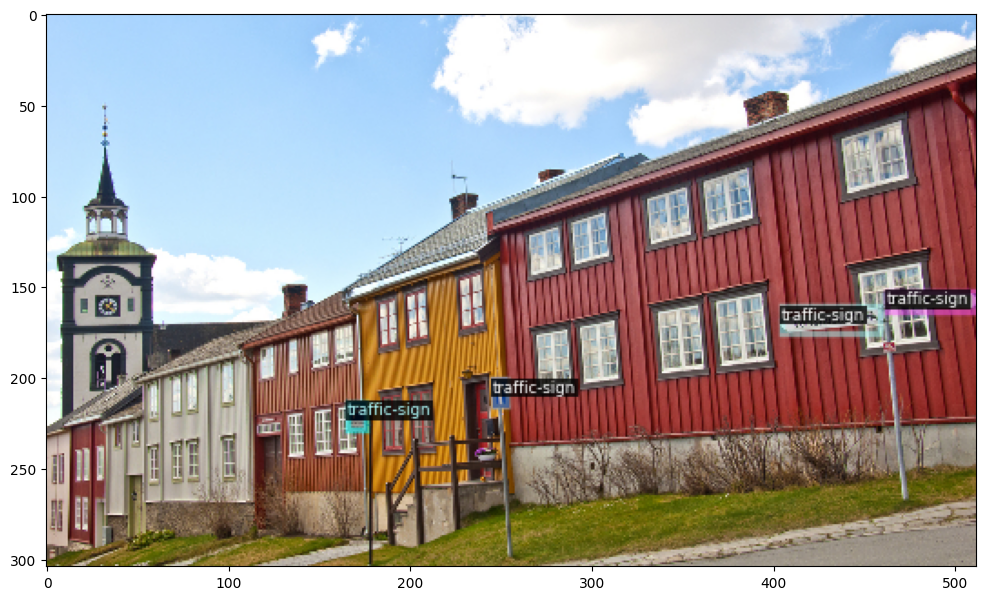

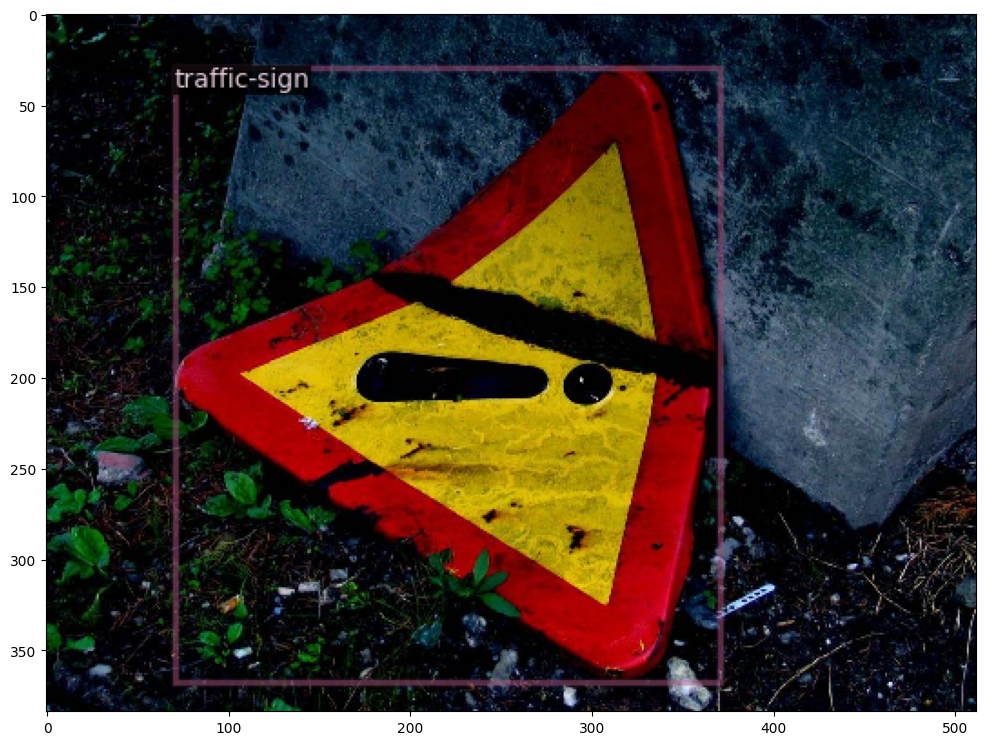

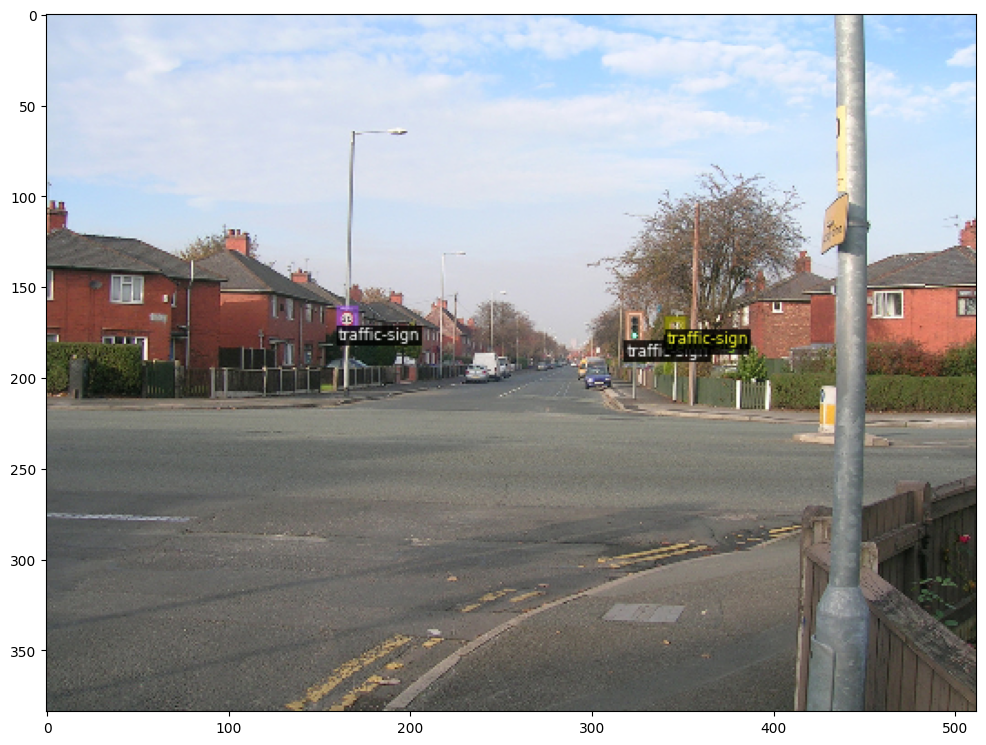

In [10]:
# lets visualize the data

test_data_dict = get_traffic_sign_dicts(data_root, test_txt)

for d in random.sample(test_data_dict, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], 
                            metadata=test_metadata, 
                            scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize = (12, 12))
    plt.imshow(vis.get_image())
    plt.show()

##  <font style="color:green">3.5. Konfigurace Detectron 2</font> 

Získejte výchozí konfiguraci detectron 2 a aktualizujte parametry podle našich požadavků. 

Získejte další podrobnosti o konfiguraci [zde](https://detectron2.readthedocs.io/modules/config.html#).

In [11]:
# detectron2 configuration

# default configuration
cfg = get_cfg()

# update configuration with RetinaNet configuration
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))

# We have registered the train and test data set with name traffic_sign_train and traffic_sign_test. 
# Let's replace the detectron2 default train dataset with our train dataset.
cfg.DATASETS.TRAIN = (train_data_name,)

# No metric implemented for the test dataset, we will have to update cfg.DATASET.TEST with empty tuple
cfg.DATASETS.TEST = ()


In [12]:
# data loader configuration
cfg.DATALOADER.NUM_WORKERS = 4

In [13]:
# Update model URL in detectron2 config file
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_3x.yaml")

In [14]:
# solver configuration

# batch size
cfg.SOLVER.IMS_PER_BATCH = 4

# choose a good learning rate
cfg.SOLVER.BASE_LR = 0.001

# We need to specify the number of iteration for training in detectron2, not the number of epochs.
# lets convert number of epoch to number or iteration (max iteration)

epoch = 2
max_iter = int(epoch * train_img_count / cfg.SOLVER.IMS_PER_BATCH)
max_iter = 500

cfg.SOLVER.MAX_ITER = max_iter 

In [15]:
# number of output class
# we have only one class that is Traffic Sign
cfg.MODEL.RETINANET.NUM_CLASSES = len(thing_classes)

In [16]:
# update create ouptput directory 
cfg.OUTPUT_DIR = output_dir
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

##  <font style="color:green">3.6. Trénink</font> 

Nyní pojďme doladit coco-předtrénovaný model `R50-FPN RetinaNet` na datové sadě dopravních značek.

#### `detectron2.engine.defaults.DefaultTrainer(cfg)`

Trenér s výchozí tréninkovou logikou. Oproti SimpleTrainer obsahuje navíc následující logiku:

- Vytvořte model, optimalizátor, plánovač, dataloader z dané konfigurace.

- Načtěte kontrolní bod nebo `cfg.MODEL.WEIGHTS`, pokud existuje, při volání `resume_or_load`.


- Zaregistrujte několik běžných hooks.

Získejte další podrobnosti [zde](https://detectron2.readthedocs.io/modules/engine.html#detectron2.engine.defaults.DefaultTrainer).

##  <font style="color:purple">Nastavte TensorBoard</font> 

Před zahájením tréninku si nastavíme TensorBoard.


In [17]:
# Look at training curves in tensorboard:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir outputs

In [ ]:
# training

# Create a trainer instance with the configuration.
trainer = DefaultTrainer(cfg) 

# if resume=False, because we don't have trained model yet. It will download model from model url and load it
trainer.resume_or_load(resume=False)

# start training
trainer.train()

[10/30 12:27:35 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

model_final_5bd44e.pkl: 152MB [00:05, 27.6MB/s]                              


[10/30 12:27:59 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/30 12:28:20 d2.utils.events]:  eta: 0:07:07  iter: 19  total_loss: 1.855  loss_cls: 1.492  loss_box_reg: 0.3367    time: 0.9127  last_time: 0.9765  data_time: 0.0258  last_data_time: 0.0120   lr: 3.8962e-05  max_mem: 3208M
[10/30 12:28:41 d2.utils.events]:  eta: 0:06:47  iter: 39  total_loss: 1.1  loss_cls: 0.9477  loss_box_reg: 0.1499    time: 0.8788  last_time: 0.7591  data_time: 0.0179  last_data_time: 0.0103   lr: 7.8922e-05  max_mem: 3208M
[10/30 12:28:58 d2.utils.events]:  eta: 0:06:21  iter: 59  total_loss: 0.8933  loss_cls: 0.7301  loss_box_reg: 0.1762    time: 0.8678  last_time: 0.9599  data_time: 0.0171  last_data_time: 0.0142   lr: 0.00011888  max_mem: 3208M


##  <font style="color:green">3.7. Odvození</font> 

Nyní pojďme provést odvození s trénovaným modelem na datové sadě ověření dopravních značek. Nejprve vytvořte prediktor pomocí modelu, který jsme právě natrénovali.

#### `detectron2.engine.defaults.DefaultPredictor(cfg)`

Vytvořte jednoduchý end-to-end prediktor s danou konfigurací, který běží na jednom zařízení pro jeden vstupní obraz.
Ve srovnání s přímým použitím modelu tato třída přináší následující doplňky:

- Načíst kontrolní bod z cfg.MODEL.WEIGHTS.


- Vždy berte BGR obrázek jako vstup a použijte konverzi definovanou pomocí `cfg.INPUT.FORMAT`.


- Použít změnu velikosti definovanou pomocí `cfg.INPUT.{MIN,MAX}_SIZE_TEST`.


- Vezměte jeden vstupní obrázek a vytvořte jediný výstup namísto dávky.

Získejte další podrobnosti [zde](https://detectron2.readthedocs.io/modules/engine.html#detectron2.engine.defaults.DefaultPredictor)

In [ ]:
# inference on our fine-tuned model

# By default detectron2 save the model with name model_final.pth
# update the model path in configuration that will be used to load the model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")


# update RetinaNet score threshold 
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5

cfg.DATASETS.TEST = (test_data_name,)

# create a predictor instance with the configuration (it has our fine-tuned model)
# this predictor does prdiction on a single image
predictor = DefaultPredictor(cfg)


In [ ]:
# let's have a look on prediction

for d in random.sample(test_data_dict, 3):
    print(d["file_name"])
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata, 
                   scale=0.8
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (12, 12))
    plt.imshow(v.get_image())
    plt.show()

# <font style="color:blue">4. Úvod do hodnocení detekce COCO a hodnocení modelu</font>

Výkon modelu vyhodnotíme pomocí AP metriky implementované v COCO API.

##  <font style="color:green">4.1. Introduction to COCO Detection Evaluation </font> 

- Již známe střední průměrnou precesi (`mAP`). Coco hodnotící metrika `AP` je ekvivalentní `mAP`.


- Místo vyhodnocování `mAP` (`AP`) pro jeden IoU (např. `IoU=0,5`) se vyhodnocuje na jiné sadě IoU.

- Má také koncept `small`, `medium` a `large` oblastí, pro které vyhodnocuje `AP` (`mAP`).

- Měří také vyvolání detekce. Pro připomenutí kategorizuje obrazy do `3-classes`: (i) maximálně `one` detekce na snímek, (ii) maximálně `ten` detekcí na snímek a (iii) maximálně `100` detekcí na třídu.

---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

Získejte další podrobnosti [zde](http://cocodataset.org/#detection-eval).

##  <font style="color:green">4.2. Hodnocení modelu</font>

K vyhodnocení našeho modelu na hodnotící metrice COCO použijeme následující API detektoru 2.


#### `detectron2.evaluation.inference_on_dataset(model, data_loader, evaluator)`

Získejte podrobnosti [zde](https://detectron2.readthedocs.io/modules/evaluation.html#detectron2.evaluation.inference_on_dataset).

- Model


- Dataloader

  `build_detection_test_loader(cfg, dataset_name, mapper=None)`
  
  - mapper (`callable`) – callable, které bere vzorek (`dict`) z datové sady a vrací formát, který má model spotřebovat. Ve výchozím nastavení to bude DatasetMapper(`cfg`, `False`)

  - Získejte další podrobnosti [zde](https://detectron2.readthedocs.io/modules/data.html#detectron2.data.build_detection_test_loader).
  
  
- Evaluator

  `COCOEvaluator(dataset_name, tasks, distributed, output_dir=None)`
  - Vyhodnoťte návrh objektu, detekci/segmentaci instance, výstupy detekce klíčových bodů pomocí metrik a API COCO.
  - Získejte další podrobnosti [zde](https://detectron2.readthedocs.io/modules/evaluation.html#detectron2.evaluation.COCOEvaluator)



In [ ]:

# create directory for evaluation
eval_dir = os.path.join(cfg.OUTPUT_DIR, 'coco_eval')
os.makedirs(eval_dir, exist_ok=True)

# create evaluator instance with coco evaluator
evaluator = COCOEvaluator(dataset_name=test_data_name, 
                          tasks=cfg, 
                          distributed=False, 
                          output_dir=eval_dir)

# create validation data loader
val_loader = build_detection_test_loader(cfg, test_data_name)

# start validation
inference_on_dataset(trainer.model, val_loader, evaluator)

# <font style="color:blue">Reference</font>

- [Detectron2 Tutorials](https://detectron2.readthedocs.io/tutorials/index.html)


- [Focal Loss for Dense Object Detection](https://arxiv.org/pdf/1708.02002.pdf) (RetinaNet)


- [Detectron2 GitHub](https://github.com/facebookresearch/detectron2)


- [Official Colab Tutorial from Detectron2](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5)


- [COCO dataset Detection Evaluation](http://cocodataset.org/#detection-eval)

- [Meta - Detectron2](https://ai.meta.com/tools/detectron2/)